In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error


# Import CBB.CSV into a dataframe
df = pd.read_csv("cbb.csv")

In [2]:
# Create description of dataframe, attained avg wins, adj offense and defenses
print(df.describe())

                 G            W        ADJOE        ADJDE      BARTHAG  \
count  3523.000000  3523.000000  3523.000000  3523.000000  3523.000000   
mean     30.486233    15.990633   103.151320   103.153250     0.494067   
std       3.951584     6.572893     7.264859     6.511989     0.255338   
min       5.000000     0.000000    76.600000    84.000000     0.005000   
25%      29.000000    11.000000    98.200000    98.400000     0.281300   
50%      31.000000    16.000000   102.800000   103.200000     0.475600   
75%      33.000000    21.000000   107.900000   107.800000     0.714250   
max      40.000000    38.000000   129.100000   124.000000     0.984200   

             EFG_O        EFG_D          TOR         TORD          ORB  ...  \
count  3523.000000  3523.000000  3523.000000  3523.000000  3523.000000  ...   
mean     49.887823    50.087113    18.696509    18.625092    29.308544  ...   
std       3.078505     2.894967     2.104119     2.241067     4.214131  ...   
min      39.20000

In [3]:
# Check for null or missing values. 
null_check = df.isnull().sum()
print(null_check)
# Missing values in Posteason & Seed are due to teams not qualifying for March Madness.

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64


GENERAL DATA

In [ ]:
# Find Average wins for league by year
avg_w_year = df.groupby('YEAR')['W'].mean()
print(f"Average Wins for League: {avg_w_year}")


Average Wins for League: YEAR
2013    15.737752
2014    15.678063
2015    15.666667
2016    15.712251
2017    17.002849
2018    17.068376
2019    17.113314
2021    12.060519
2022    16.645251
2023    17.115702
Name: W, dtype: float64


In [ ]:
# Attain and sort average team wins
avg_wins_team = df.groupby('TEAM')['W'].mean()
sorted_avg_wins_desc = avg_wins_team.sort_values(ascending=False)
print(sorted_avg_wins_desc)

TEAM
Gonzaga                   30.7
Kansas                    28.5
Duke                      27.7
Villanova                 27.3
Arizona                   27.3
                          ... 
San Jose St.               7.5
Delaware St.               7.2
Maine                      6.5
Chicago St.                5.4
Mississippi Valley St.     5.1
Name: W, Length: 368, dtype: float64


In [12]:
# Find correlation between adjusted offense and defenses for winning
w_to_adjoe = df[['W','ADJOE']].corr()
print(w_to_adjoe)

w_to_adjde = df[['W','ADJDE']].corr()
print(w_to_adjde)

              W     ADJOE
W      1.000000  0.736713
ADJOE  0.736713  1.000000
            W   ADJDE
W      1.0000 -0.6557
ADJDE -0.6557  1.0000


COLLEGE BASKETBALL CHAMPIONS DATA

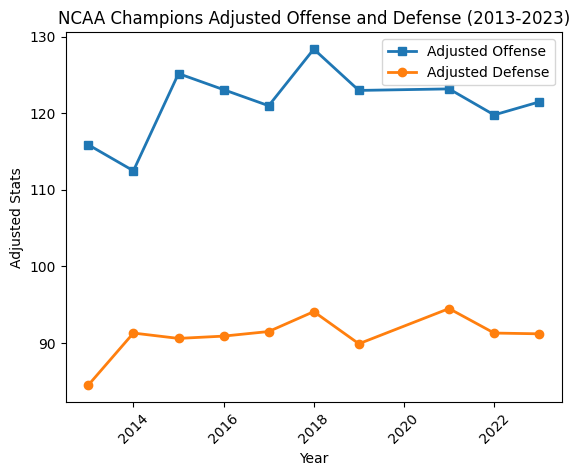

In [20]:
# Find and Sort Champions From 2013 - 2023
champions = df[df['POSTSEASON'] == 'Champions'].sort_values(by='YEAR', ascending=False)
#print(champions)

# Plot Champions Adjusted Offense & Defense
plt.plot(champions["YEAR"], champions['ADJOE'], label="Adjusted Offense", marker='s', linestyle='-', linewidth=2)
plt.plot(champions["YEAR"], champions["ADJDE"], label="Adjusted Defense", marker='o', linestyle='-', linewidth=2)

plt.xlabel("Year")
plt.ylabel("Adjusted Stats")
plt.title("NCAA Champions Adjusted Offense and Defense (2013-2023)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

IOWA STATE SPECIFIC DATA

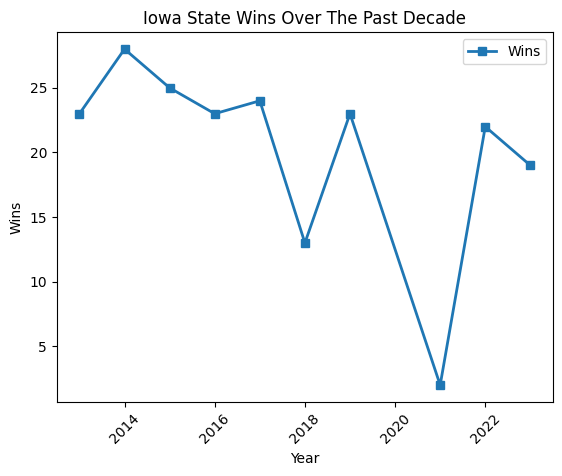

In [21]:
#Locate all Iowa State Performances 
df_ISU = df[df['TEAM'] == 'Iowa St.'].copy()

#Sort Iowa State teams in order by year
isu_stats_byyr = df_ISU.sort_values(by='YEAR', ascending=False)
#print(isu_stats_byyr)

# Plot Iowa State Wins From 2013 - 2023 
plt.plot(isu_stats_byyr["YEAR"], isu_stats_byyr["W"], label="Wins", marker='s', linestyle='-', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Wins")
plt.title("Iowa State Wins Over The Past Decade")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


Model Accuracy: 0.50
W          1.000000
G          0.972076
WAB        0.962941
BARTHAG    0.956621
FTR        0.751161
2P_O       0.738777
EFG_O      0.727606
ADJOE      0.714356
3P_O       0.506373
ORB        0.286200
ADJ_T      0.099243
3P_D       0.048478
TORD      -0.008553
ADJDE     -0.348154
FTRD      -0.367044
SEED      -0.473664
YEAR      -0.515566
DRB       -0.559638
TOR       -0.654295
2P_D      -0.835928
EFG_D     -0.886364
Name: W, dtype: float64


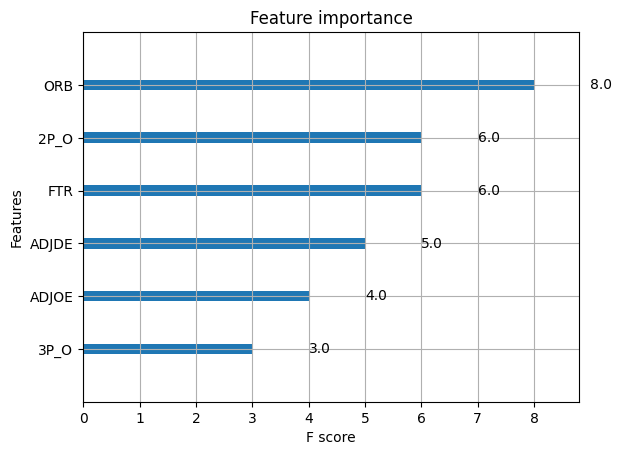

In [ ]:
# Finding correlation of Iowa State wins by variables
df_ISU["WIN_CATEGORY"] = pd.cut(df_ISU['W'], bins=[0,10,20,30], labels=[0,1,2])
x = df_ISU[['FTR','2P_O','ADJOE','3P_O','ORB','ADJDE']]
y = df_ISU['WIN_CATEGORY']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective = "multi:softmax", num_class = 3, eval_metric ="mlogloss")
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")                                     # Find accuracy of correlation between selected variables and ISU wins
df_numeric = df_ISU.select_dtypes(include = ['number'])
print(df_numeric.corr()['W'].sort_values(ascending=False))                  # Find correlation between stats and wins

xgb.plot_importance(model)
plt.show()

In [23]:
# Predicting Future Wins for Iowa State 2023-2024 Season 

features = ['FTR','2P_O','ADJOE','3P_O','ORB','ADJDE']
target = 'W'

df_ISU = df_ISU.dropna(subset= features + [target])
X_train, X_test, y_train, y_test = train_test_split(df_ISU[features], df_ISU[target], test_size=0.2, random_state = 42)

train_dmatrix = xgb.DMatrix(X_train, label = y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)


# Define Parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "max_depth": 3,
    "learning_rate":0.1,}


# Training Model
model = xgb.train(params, train_dmatrix, num_boost_round=100)

y_pred = model.predict(test_dmatrix)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


future_data = pd.DataFrame({
    "FTR": [29.4],
    "2P_O": [52.01],
    "ADJOE": [113.18],
    "3P_O": [35.68],
    "ORB": [28.76],
    "ADJDE": [96.55]})

# Final Predictions for Iowa State Wins
future_dmatrics = xgb.DMatrix(future_data)
future_wins = model.predict(future_dmatrics)
print(f"Predicted Wins: {future_wins[0]}")



Mean Absolute Error: 3.997039794921875
Predicted Wins: 23.131349563598633
